In [86]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn import metrics

In [87]:
data=pd.read_csv("worksample_data.csv")
data

,Unnamed: 0,case,record,cond,ae_m,ae_v,se_m,se_v,hfd_m,hfd_v,dfa_m,dfa_v,psd_m,psd_v
0,0,p000638,3033264_0005,atrial_fibrillation,1.114328,0.006364,1.014952,0.009344,2.062579,0.000213,0.357675,0.003759,0.707119,0.004973
1,1,p000638,3033264_0007,atrial_fibrillation,1.128314,0.005094,1.019000,0.007935,2.062636,0.000320,0.305381,0.004328,0.670582,0.006041
2,2,p000638,3033264_0008,atrial_fibrillation,1.182164,0.018420,1.065136,0.042754,2.043882,0.000665,0.339816,0.009309,0.736152,0.008183
3,3,p000638,3033264_0009,atrial_fibrillation,1.288425,0.024384,1.221510,0.057924,2.020016,0.000103,0.502655,0.002594,0.875502,0.001638
4,4,p001170,3612801_0008,atrial_fibrillation,0.493513,0.039231,0.290480,0.031252,2.104450,0.001487,0.094455,0.002014,0.313816,0.015252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,63,p000154,3794082_0001,myocardial_infarction,0.582774,0.053045,0.473902,0.058073,2.146280,0.005843,0.133404,0.002195,0.410789,0.016720
64,64,p000154,3794082_0002,myocardial_infarction,0.818121,0.043284,0.758590,0.084491,2.114590,0.002297,0.151744,0.002885,0.506779,0.007265
65,65,p000154,3794082_0005,myocardial_infarction,0.672129,0.021658,0.575879,0.030423,2.143030,0.002456,0.117214,0.001214,0.403666,0.015805
66,66,p000154,3794082_0007,myocardial_infarction,0.806108,0.034007,0.768532,0.046890,2.095581,0.000912,0.138230,0.002504,0.546346,0.003729


In [93]:
atrial_fibrillation=data[0:21][['ae_m', 'ae_v','se_m','se_v','hfd_m','dfa_m','psd_m','psd_v']]
congestive_heartf=data[22:56][['ae_m', 'ae_v','se_m','se_v','hfd_m','dfa_m','psd_m','psd_v']]
myocardial_infarction=data[57:68][['ae_m', 'ae_v','se_m','se_v','hfd_m','dfa_m','psd_m','psd_v']]
X=data[0:56][['ae_m', 'ae_v','se_m','se_v','hfd_m','dfa_m','psd_m','psd_v']]
X

,ae_m,ae_v,se_m,se_v,hfd_m,dfa_m,psd_m,psd_v
0,1.114328,0.006364,1.014952,0.009344,2.062579,0.357675,0.707119,0.004973
1,1.128314,0.005094,1.019000,0.007935,2.062636,0.305381,0.670582,0.006041
2,1.182164,0.018420,1.065136,0.042754,2.043882,0.339816,0.736152,0.008183
3,1.288425,0.024384,1.221510,0.057924,2.020016,0.502655,0.875502,0.001638
4,0.493513,0.039231,0.290480,0.031252,2.104450,0.094455,0.313816,0.015252
5,0.442666,0.018050,0.337303,0.019171,2.185148,0.061245,0.285716,0.005662
6,0.347573,0.011215,0.257088,0.018671,2.251124,0.058873,0.274569,0.010864
7,0.291551,0.015736,0.231032,0.019222,2.260250,0.053119,0.231789,0.007026
8,0.351475,0.041689,0.195595,0.020389,2.194915,0.215858,0.328406,0.014825
9,0.511196,0.007982,0.367902,0.011456,2.112229,0.353809,0.566896,0.003159


<h2>Atrial Fibrillation<h2>

In [100]:
Y= []
for x in range(len(atrial_fibrillation)+1):
    Y.append(0)
    
for i in range(len(congestive_heartf)):
    Y.append(1)
len(Y)

56

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=0)
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
y_test=np.array(y_test)

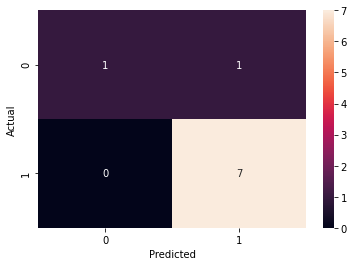

In [105]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [103]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
y_pred

Accuracy:  0.75


array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])